# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_{w} Q(w) = 2X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: [96883556](https://contest.yandex.ru/contest/54610/run-report/96883556/)


* **StochasticDescent**: [96883576](https://contest.yandex.ru/contest/54610/run-report/96883576/)


* **MomentumDescent**: [96883592](https://contest.yandex.ru/contest/54610/run-report/96883592/)


* **Adam**: [96885440](https://contest.yandex.ru/contest/54610/run-report/96885440/)


* **LinearRegression**: [96885053](https://contest.yandex.ru/contest/54610/run-report/96885053/)

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

<Axes: xlabel='price', ylabel='Count'>

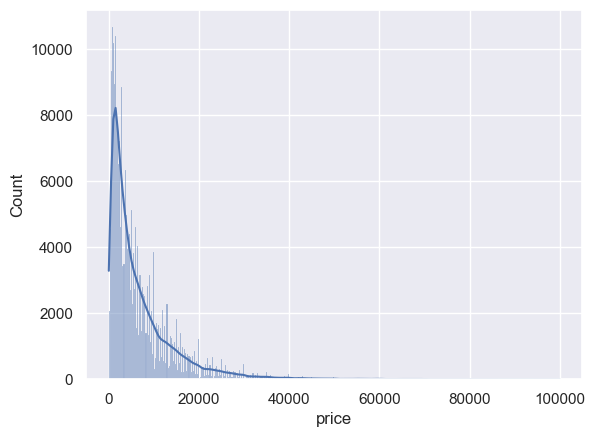

In [11]:
sns.histplot(data, x="price", kde=True)

<Axes: xlabel='price', ylabel='Count'>

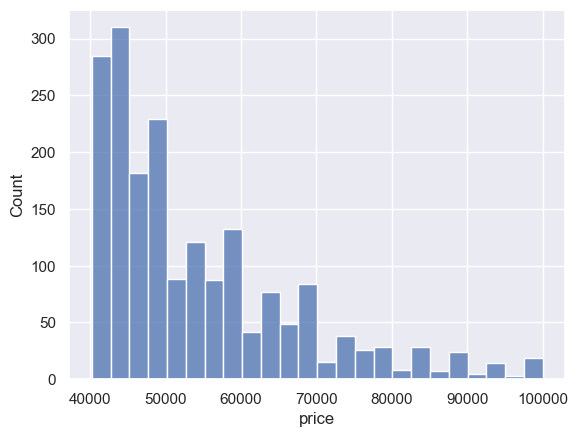

In [12]:
sns.histplot(data[data.price > 40000], x="price")

<Axes: xlabel='price', ylabel='Count'>

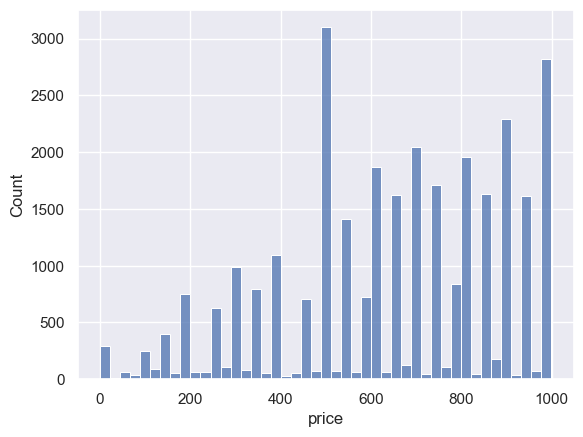

In [13]:
sns.histplot(data[data.price < 1000], x="price")

Сразу можем удалить машины стоимостью свыше 90к - это какой-то супер премиальный класс и их там по пальцам пересчитать, а также машины стоимостью 0. Хорошая идея здесь - сразу подумать либо о разделении машин на классы премиальности, чтобы сделать отдельную модель для каждого, либо о хорошей фильтрации датасета под задачу - мы автодилер дорогих авто или же мы авторынок вёдер

In [14]:
data = data[(data.price > 0) & (data.price < 90000)]

<Axes: xlabel='price', ylabel='Count'>

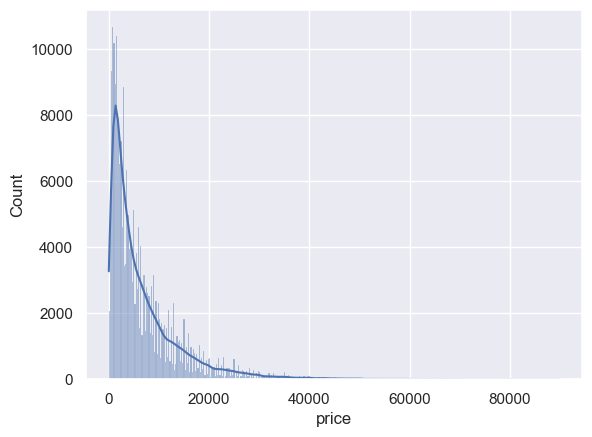

In [15]:
sns.histplot(data, x="price", kde=True)

У нас есть тяжелый хвост, но выкидывать его просто так - не самая хорошая идея. А еще распределение очень похоже на лог-нормальное - проверим

In [16]:
data["log_price"] = np.log1p(data["price"])

<Axes: xlabel='log_price', ylabel='Count'>

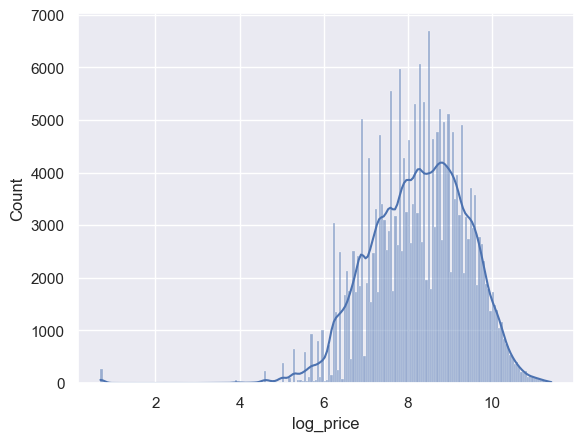

In [17]:
sns.histplot(data, x="log_price", kde=True)

Виден тяжелый хвост слева - печаль

<Axes: xlabel='log_price', ylabel='Count'>

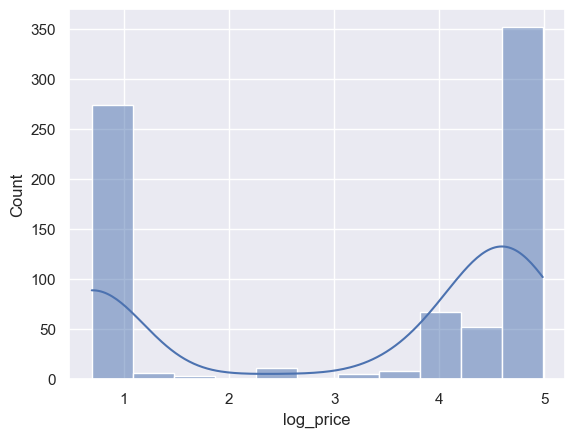

In [18]:
sns.histplot(data[data.log_price < 5], x="log_price", kde=True)

<Axes: xlabel='price', ylabel='Count'>

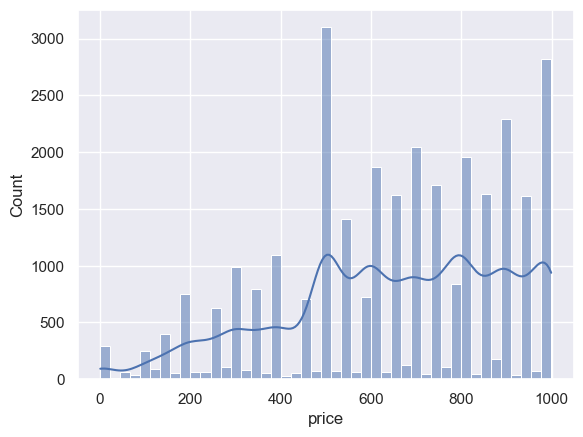

In [19]:
sns.histplot(data[data.price < 1000], x="price", kde=True)

Это тоже что-то странное - еще чуть обрежем хвост

In [20]:
data = data[data.price > 100]

<Axes: xlabel='log_price', ylabel='Count'>

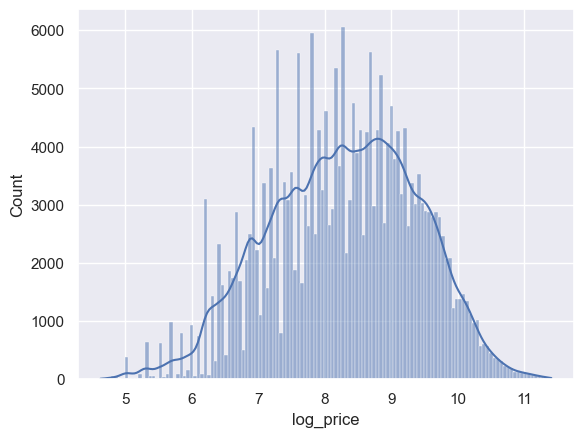

In [21]:
sns.histplot(data, x="log_price", kde=True)

Вот так-то лучше!

Теперь заметим, что если мы будем обучать на цене, то вряд ли будем точны при предсказании дорогих машин - а так как мы не знаем точную задачу, то их мы тоже хотим предсказывать. Наверное, внутренняя логика подсказывает, что логичнее было бы предиктить цену, но вот разумный машин-лернер внутри меня говорит, что строить модели на лог-нормально распределении == забивать на большие значения или наоборот переобучаться под них в зависимости от функции потерь. А значит будем предиктить log_price или что то же самое, как было описано в прошлой дз, обучаться под RMSLE цены

In [22]:
data.loc[data["notRepairedDamage"] == "ja", ["notRepairedDamage"]] = 1.0
data.loc[data["notRepairedDamage"] == "nein", ["notRepairedDamage"]] = 0.0

Вот теперь разделим выборку на train+val и test, чтобы не видеть паттерны в тестовой выборке и не подгоняться под них

In [23]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
data_val, data_test = train_test_split(data_test, test_size=0.5, shuffle=False)
len(data_train), len(data_val), len(data_test)

(192392, 24049, 24050)

<Axes: xlabel='log_price', ylabel='Count'>

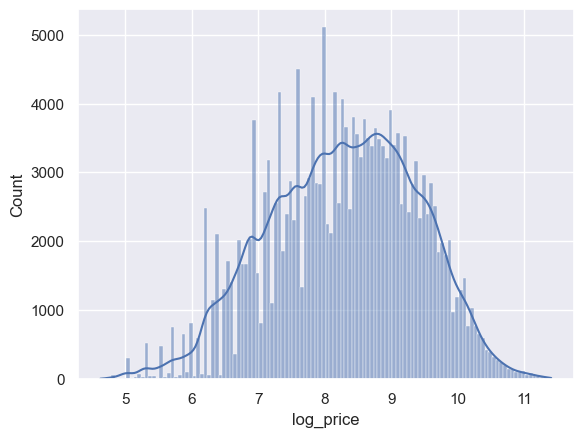

In [24]:
sns.histplot(data_train, x="log_price", kde=True)

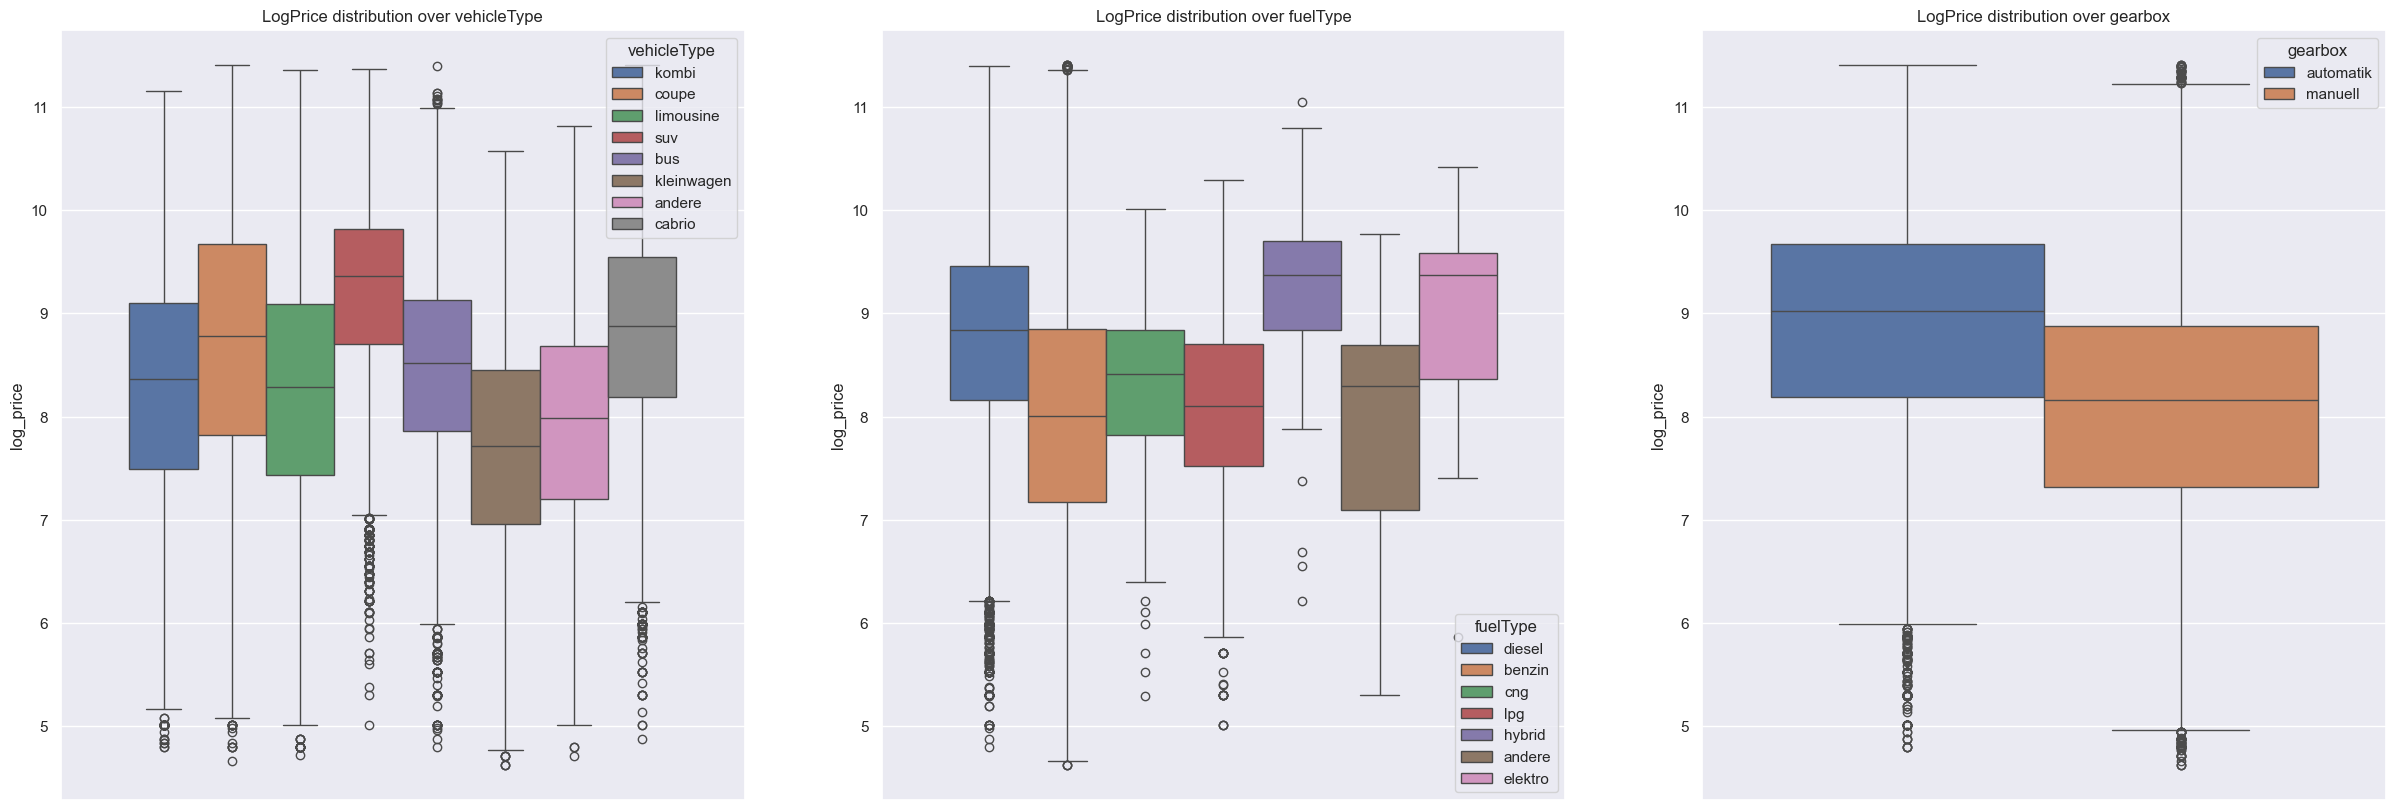

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

for (i, feature) in enumerate(["vehicleType", "fuelType", "gearbox"]):
    axes[i].set_title(f"LogPrice distribution over {feature}")
    sns.boxplot(data_train, hue=feature, y="log_price", ax=axes[i])
plt.show()

In [26]:
data_train.loc[data["gearbox"] == "automatik", ["automatic_gearbox"]] = 1.0
data_train.loc[data["gearbox"] == "manuell", ["automatic_gearbox"]] = 0.0

data_test.loc[data["gearbox"] == "automatik", ["automatic_gearbox"]] = 1.0
data_test.loc[data["gearbox"] == "manuell", ["automatic_gearbox"]] = 0.0

data_val.loc[data["gearbox"] == "automatik", ["automatic_gearbox"]] = 1.0
data_val.loc[data["gearbox"] == "manuell", ["automatic_gearbox"]] = 0.0

Тут видны действительно согласующиеся с реальностью закономерность - электро и гибриды дороже рынка, бензиновые - самые дешевые. Аналогично малолитражные легковушки - самые дешевые, а вот suv'ы - самые дорогие.
Здесь мало классов - достаточно будет OneHotEncoder

<Axes: xlabel='log_price', ylabel='brand'>

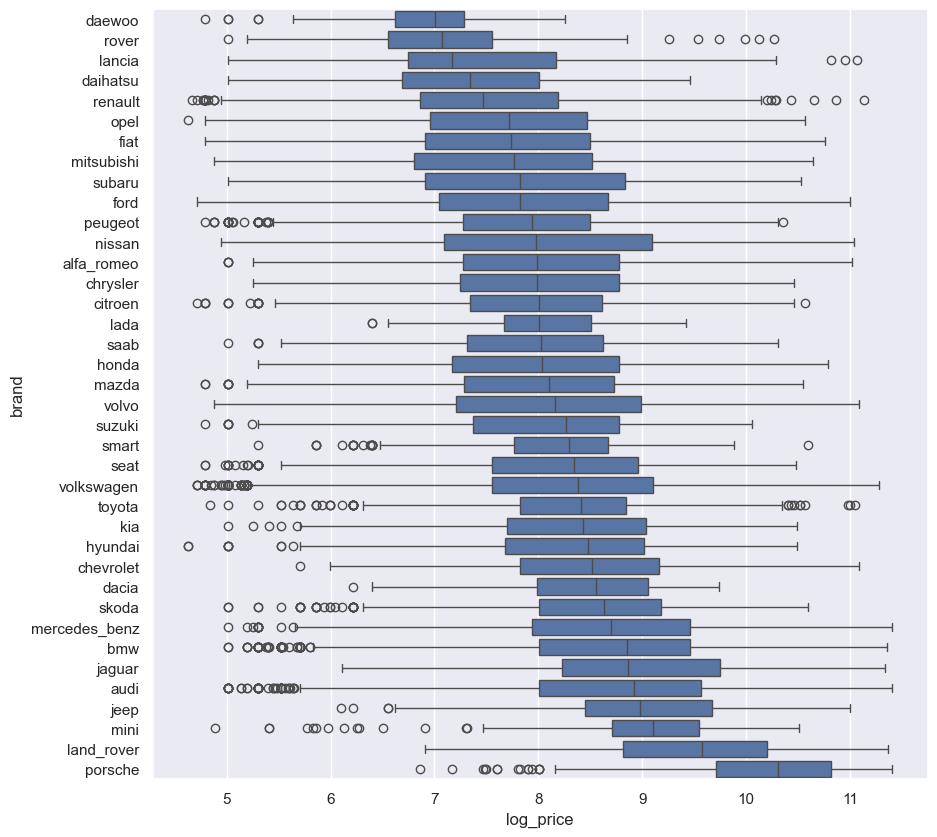

In [27]:
plt.figure(figsize=(10, 10))
grouped = data_train.loc[:,['brand', 'log_price']] \
    .groupby(['brand']) \
    .median() \
    .sort_values(by='log_price')
sns.boxplot(data_train, y="brand", x="log_price", order=grouped.index)

<Axes: xlabel='log_price', ylabel='model'>

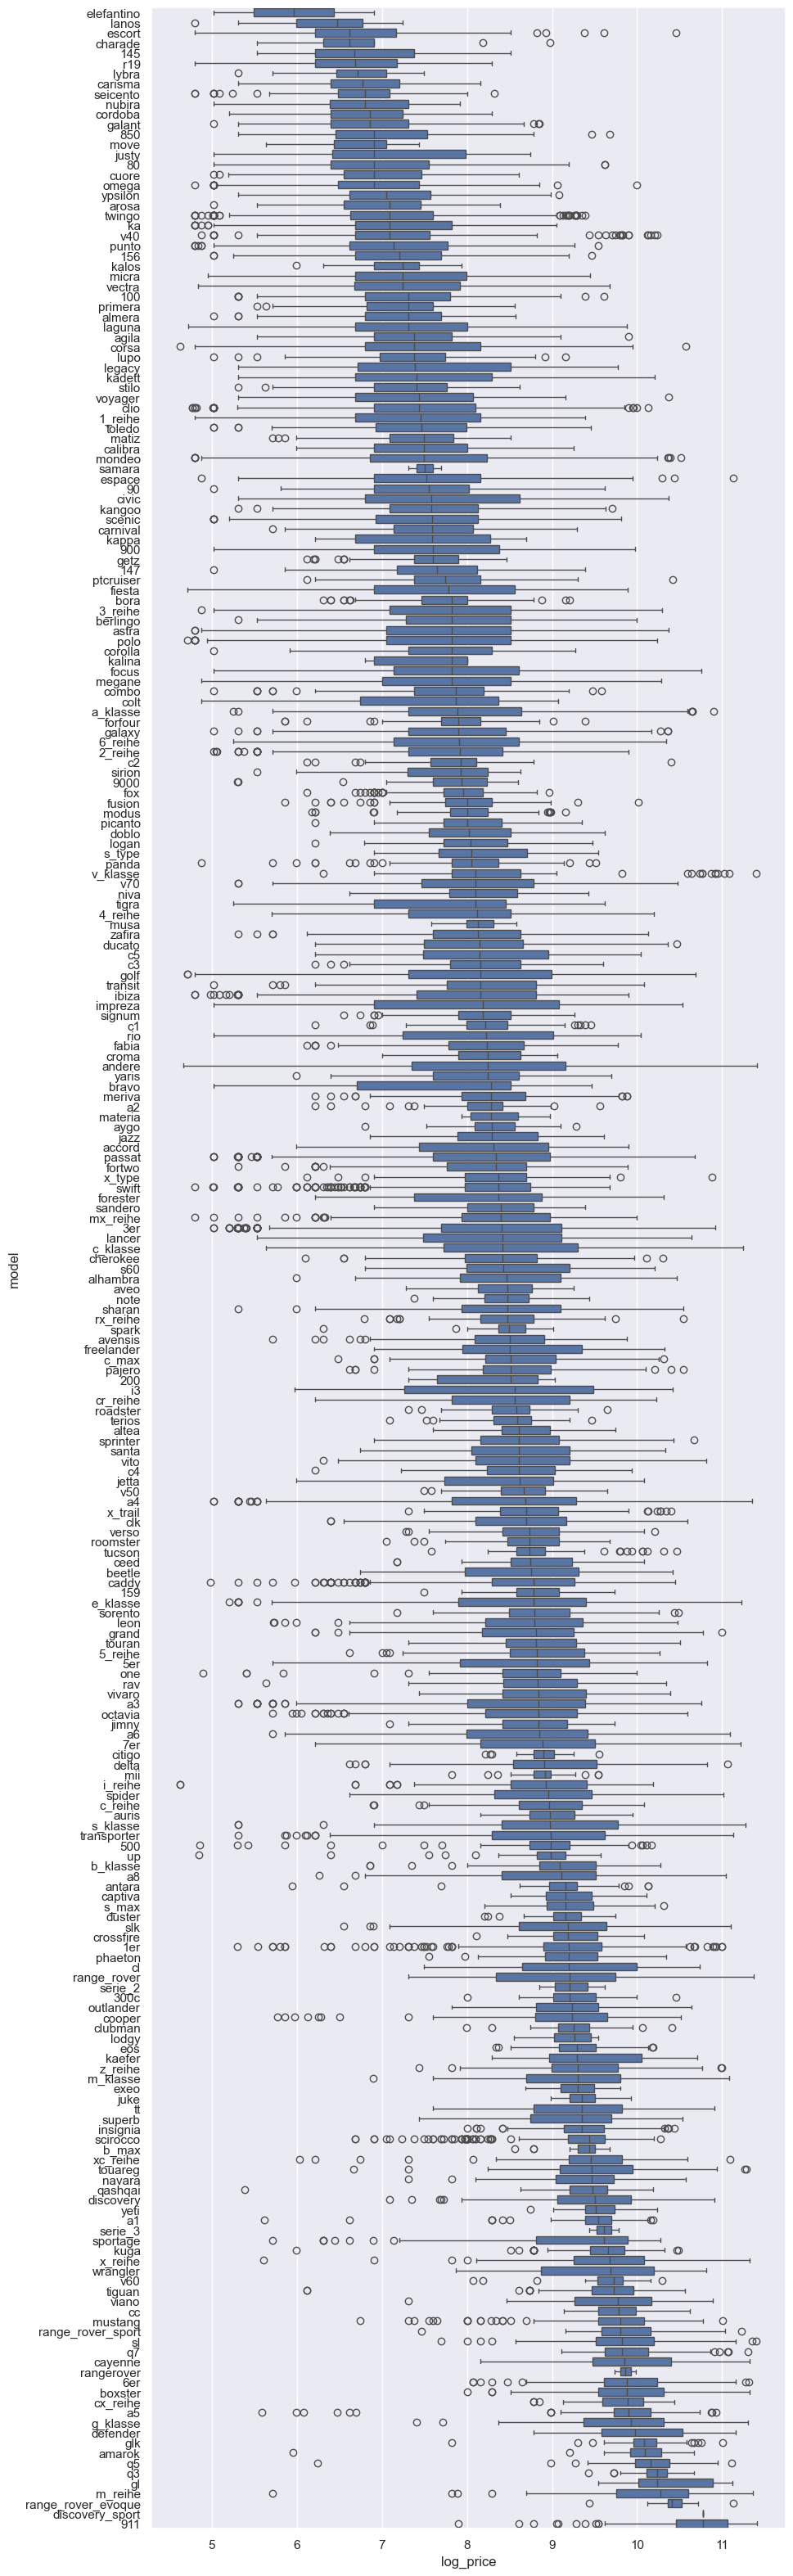

In [28]:
plt.figure(figsize=(10, 40))
grouped = data_train.loc[:,['model', 'log_price']] \
    .groupby(['model']) \
    .median() \
    .sort_values(by='log_price')
sns.boxplot(data_train, y="model", x="log_price", order=grouped.index)

Извиняюсь, что без цвета - sns почему-то без hue не хочет делать цветные столбики(((

Тут тоже можно заметить, что есть дорогие марки, а есть - дешевые и аналогично с моделью. Еще можно сразу заметить, что по признаку марки у нас нет гетероскедастичности - дисперсия цены дорогих марок значительно ниже дисперсии цены дешевых - это немного испортит модель. Еще есть гипотеза, что модель + пробег == прекрасная модель.

In [29]:
len(np.unique(data_train.brand.values)), len(np.unique(data_train.model.values))

(38, 249)

Тут у нас уже довольно много признаков - хорошо бы использовать MTE

Теперь глянем на численные признаки

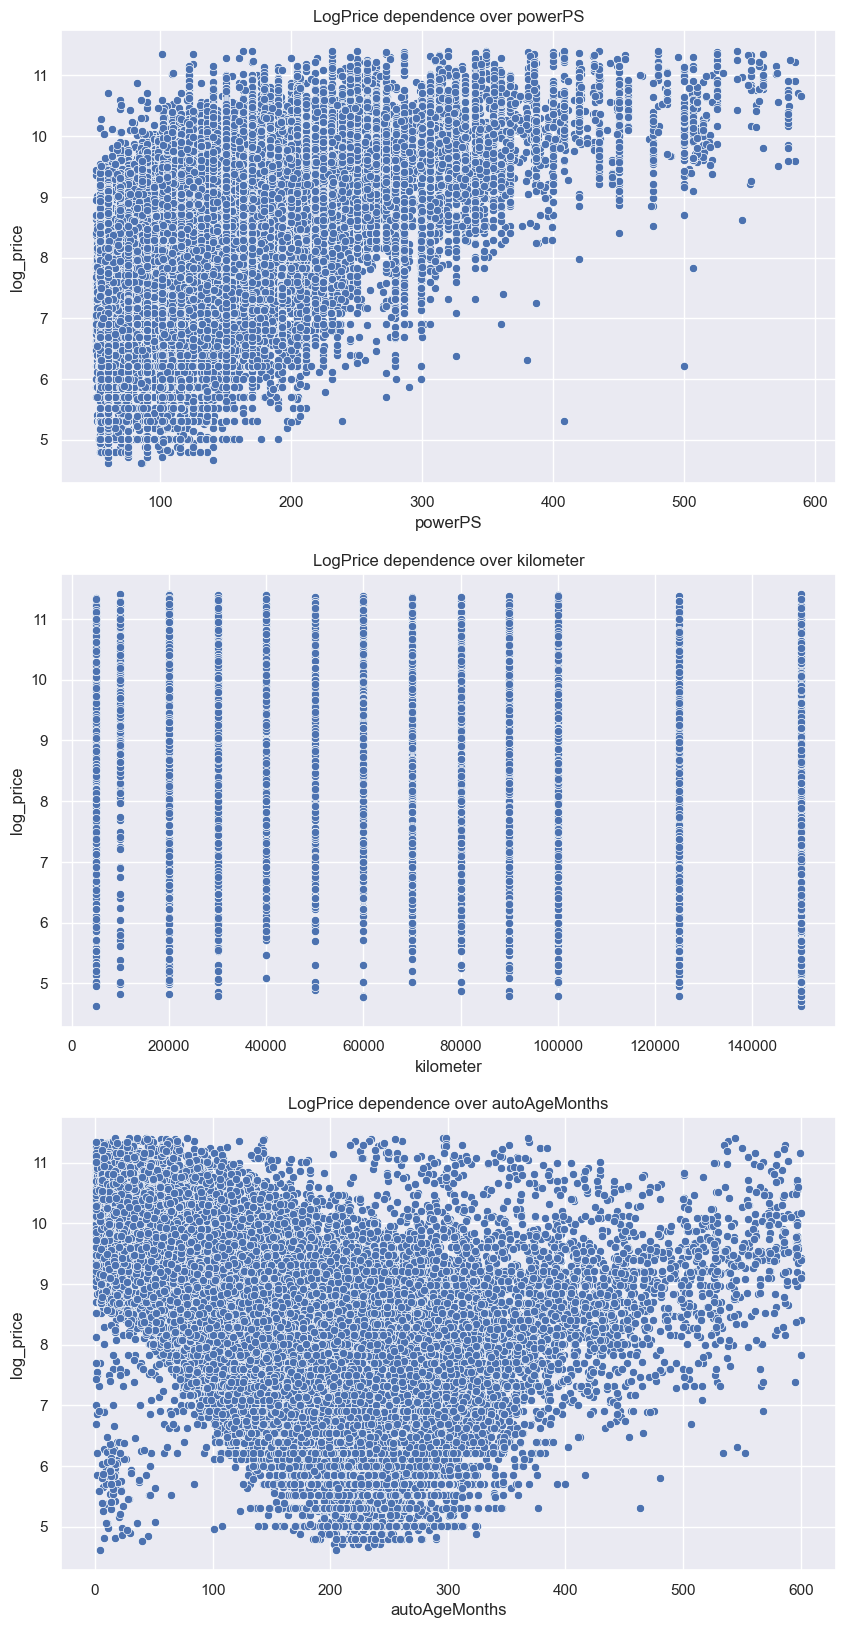

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

for (i, feature) in enumerate(["powerPS", "kilometer", "autoAgeMonths"]):
    axes[i].set_title(f"LogPrice dependence over {feature}")
    sns.scatterplot(data_train, x=feature, y="log_price", ax=axes[i])
plt.show()

Тут можно заметить два факта: пробег вообще говоря дискретный (если быть точнее - порядковый) и точек слишком много - такая отрисовка дает нам ровным счетом ничего(

In [31]:
km_sorted = np.unique(np.sort(data_train.kilometer.values)).astype("str")
km_sorted

array(['5000', '10000', '20000', '30000', '40000', '50000', '60000',
       '70000', '80000', '90000', '100000', '125000', '150000'],
      dtype='<U21')

In [32]:
data_train["km_str"] = data_train.kilometer.astype("str")
data_test["km_str"] = data_test.kilometer.astype("str")
data_val["km_str"] = data_val.kilometer.astype("str")

<Axes: xlabel='log_price', ylabel='km_str'>

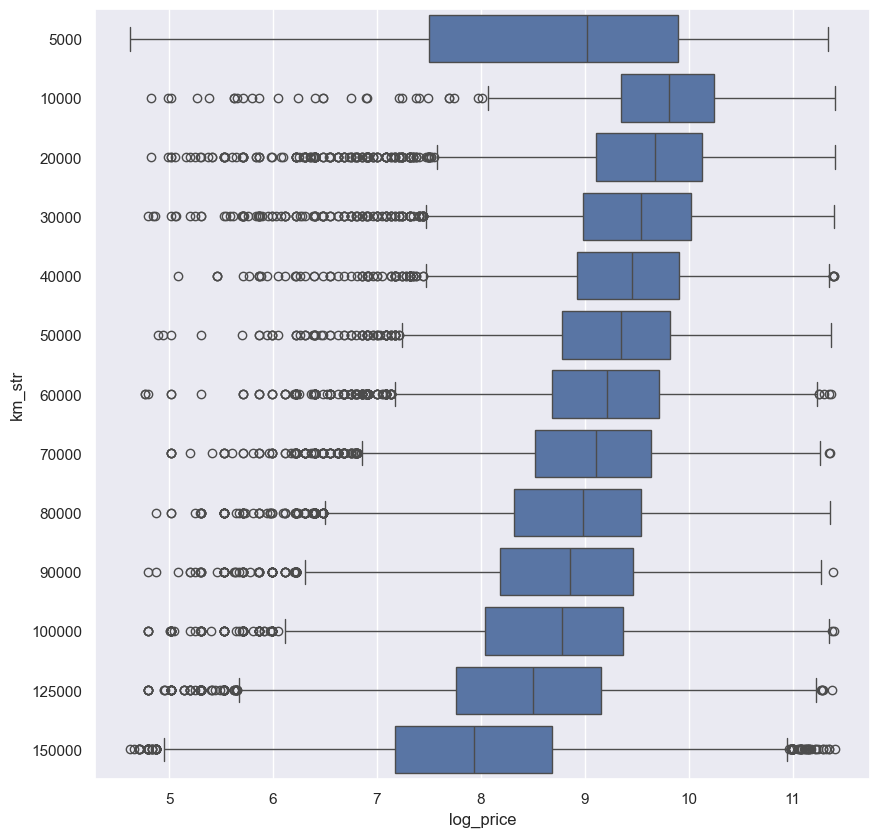

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(data_train, y="km_str", x="log_price", order=km_sorted)

<Axes: xlabel='count', ylabel='kilometer'>

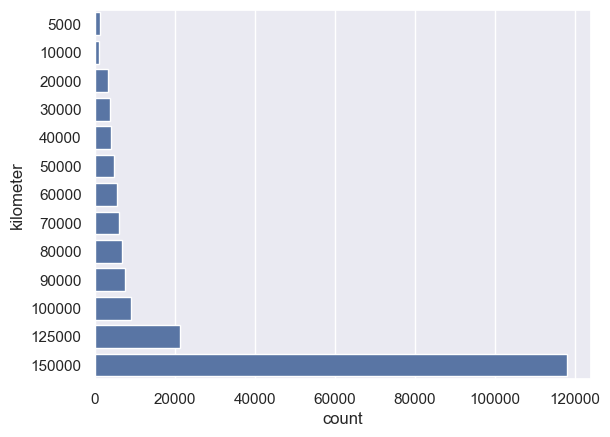

In [34]:
sns.countplot(data_train, y="kilometer")

Скорее всего, в 150к входит 150+, от этого там так много. Видно, что есть обратная зависимость - можно оставить как порядковую фичу

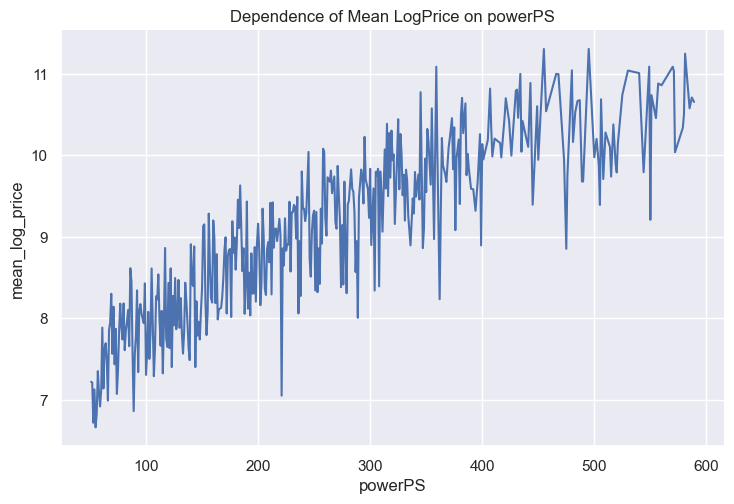

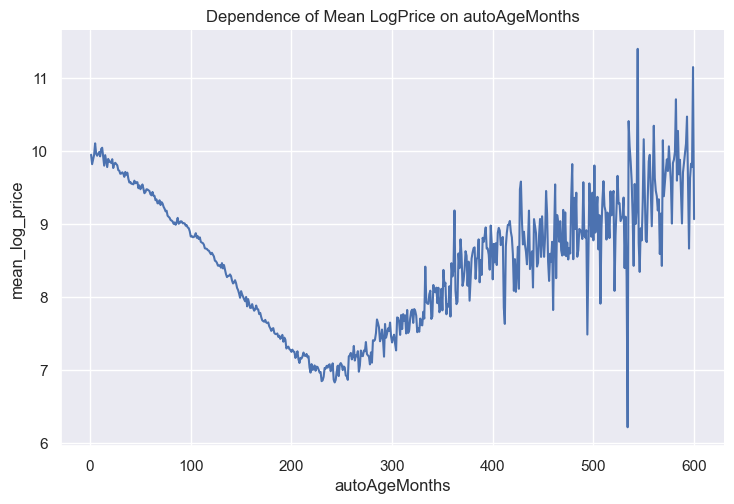

In [35]:
sns.relplot(
    data=data_train.groupby(["powerPS"]).agg({"log_price" : "mean"}).rename(columns={"log_price" : "mean_log_price"}),
    x="powerPS",
    y="mean_log_price",
    kind="line",
    aspect=1.5
).set(
    title="Dependence of Mean LogPrice on powerPS"
)
plt.show()

sns.relplot(
    data=data_train.groupby(["autoAgeMonths"]).agg({"log_price" : "mean"}).rename(columns={"log_price" : "mean_log_price"}),
    x="autoAgeMonths",
    y="mean_log_price",
    kind="line",
    aspect=1.5
).set(
    title="Dependence of Mean LogPrice on autoAgeMonths"
)
plt.show()

In [36]:
len(data_train[data_train.autoAgeMonths > 240]) / len(data_train)

0.07900536404840118

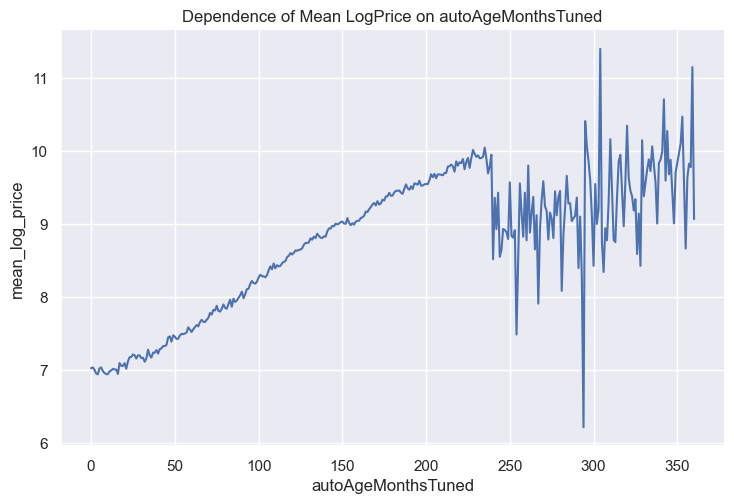

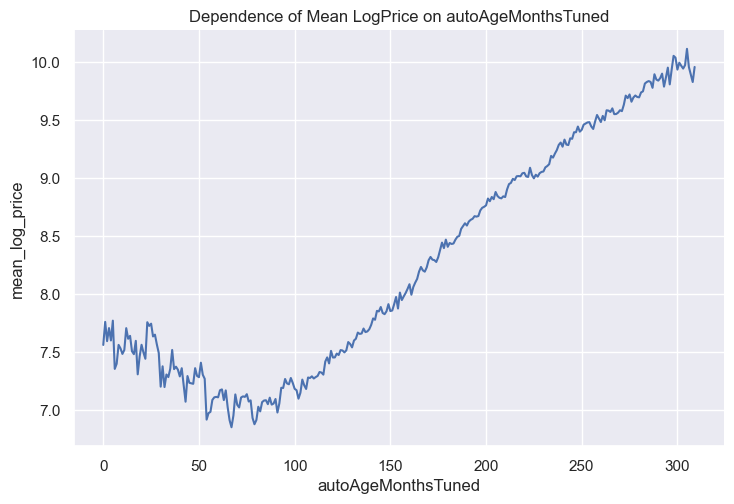

In [37]:
data_train["autoAgeMonthsTuned"] = np.abs(data_train["autoAgeMonths"] - 240)
sns.relplot(
    data=data_train.groupby(["autoAgeMonthsTuned"]).agg({"log_price" : "mean"}).rename(columns={"log_price" : "mean_log_price"}),
    x="autoAgeMonthsTuned",
    y="mean_log_price",
    kind="line",
    aspect=1.5
).set(
    title="Dependence of Mean LogPrice on autoAgeMonthsTuned"
)
plt.show()

data_train["autoAgeMonthsTuned"] = np.abs(data_train["autoAgeMonths"] - 310)
sns.relplot(
    data=data_train.groupby(["autoAgeMonthsTuned"]).agg({"log_price" : "mean"}).rename(columns={"log_price" : "mean_log_price"}),
    x="autoAgeMonthsTuned",
    y="mean_log_price",
    kind="line",
    aspect=1.5
).set(
    title="Dependence of Mean LogPrice on autoAgeMonthsTuned"
)
plt.show()

Возможно, тут есть граница между "старое ведро" и "ооо, раритет" - 20 лет. А еще снова гетероскедастичность(
Можно было бы сделать $|feature - x|$ и работать с такой величиной, нооо гетероскедастичность мешает нам - дисперсия раритетов выше и зависимость чуть более пологая - поэтому решение такое: разделим эту фичу на две: до 240 и свыше 240 - остальное занулим. Конечно, после шкалирования нули сместятся, но, я верю, что нас спасет свободный член

С мощностью все ок - в идеале модель должна выучить тренд, а все остальное - это оставшиеся фичи + шум

In [38]:
data_train["autoStandardAgeMonths"] = data_train["autoAgeMonths"] * (data_train["autoAgeMonths"] <= 240)
data_train["autoRareAgeMonths"] = data_train["autoAgeMonths"] * (data_train["autoAgeMonths"] > 240)

data_test["autoStandardAgeMonths"] = data_test["autoAgeMonths"] * (data_test["autoAgeMonths"] <= 240)
data_test["autoRareAgeMonths"] = data_test["autoAgeMonths"] * (data_test["autoAgeMonths"] > 240)

data_val["autoStandardAgeMonths"] = data_val["autoAgeMonths"] * (data_val["autoAgeMonths"] <= 240)
data_val["autoRareAgeMonths"] = data_val["autoAgeMonths"] * (data_val["autoAgeMonths"] > 240)

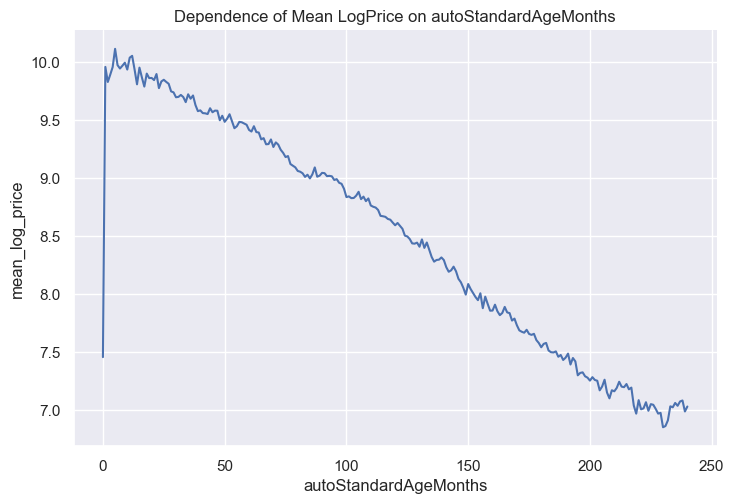

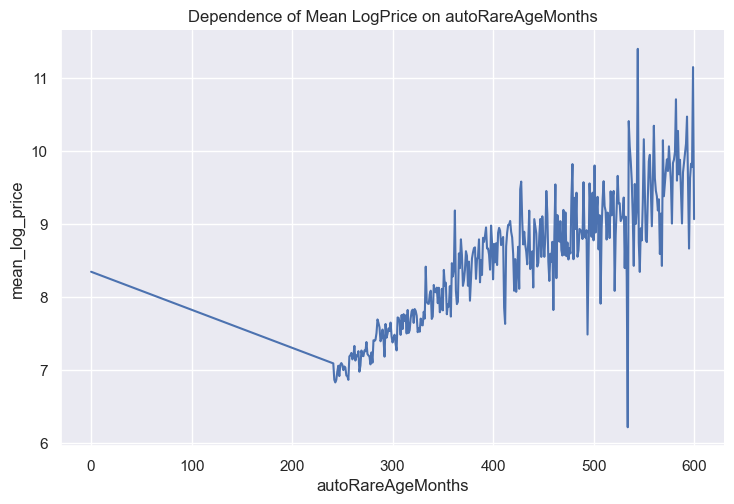

In [39]:
sns.relplot(
    data=data_train.groupby(["autoStandardAgeMonths"]).agg({"log_price" : "mean"}).rename(columns={"log_price" : "mean_log_price"}),
    x="autoStandardAgeMonths",
    y="mean_log_price",
    kind="line",
    aspect=1.5
).set(
    title="Dependence of Mean LogPrice on autoStandardAgeMonths"
)
plt.show()

sns.relplot(
    data=data_train.groupby(["autoRareAgeMonths"]).agg({"log_price" : "mean"}).rename(columns={"log_price" : "mean_log_price"}),
    x="autoRareAgeMonths",
    y="mean_log_price",
    kind="line",
    aspect=1.5
).set(
    title="Dependence of Mean LogPrice on autoRareAgeMonths"
)
plt.show()

Нули модели не помеха, как говорится

Ну и последнее - бинарная фича про восстановленные машины

<Axes: ylabel='log_price'>

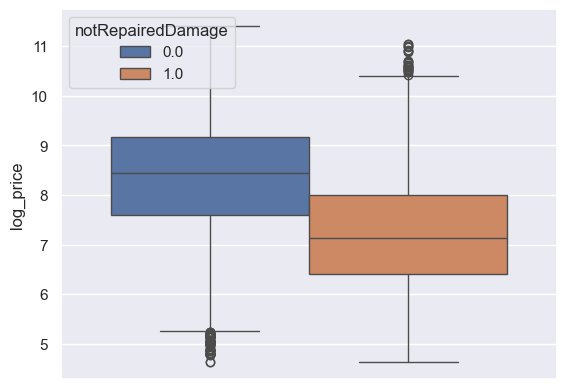

In [40]:
sns.boxplot(data_train, hue="notRepairedDamage", y="log_price")

Тут, как и ожидалось, все ок

In [41]:
# categorical_ohe = ['brand', 'model']
# categorical_mte = ['vehicleType', 'fuelType']
# ordinal = ["km_str"]
# numeric = ["powerPS", "autoStandardAgeMonths", "autoRareAgeMonths"]
# other = ["notRepairedDamage", "automatic_gearbox"]

К сожалению, наш самописный линрег взрывается на lr > 1e-1, если кормить ему нешкалированные фичи, но библиотечному норм((\
Поэтому мне придется остановиться на ohe, numeric и other(


In [42]:
categorical_ohe = ['brand', 'model', 'vehicleType', 'fuelType', "km_str"]
numeric = ["powerPS", "autoStandardAgeMonths", "autoRareAgeMonths"]
other = ["notRepairedDamage", "automatic_gearbox"]
ordinal = []
categorical_mte = []

In [43]:
data_train['bias'] = 1
data_test['bias'] = 1
data_val['bias'] = 1
other += ['bias']

x_train = data_train[categorical_ohe + categorical_mte + numeric + ordinal + other]
y_train = data_train['log_price'].to_numpy()
x_test = data_test[categorical_ohe + categorical_mte + numeric + ordinal + other]
y_test = data_test['log_price'].to_numpy()
x_val = data_val[categorical_ohe + categorical_mte + numeric + ordinal + other]
y_val = data_val['log_price'].to_numpy()

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_ohe),
    ('mte', TargetEncoder(target_type='continuous', shuffle=False), categorical_mte),
    ('ord', OrdinalEncoder(categories=[km_sorted]), ordinal),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x_train = column_transformer.fit_transform(x_train, y_train).astype(np.float64)
x_test = column_transformer.transform(x_test).astype(np.float64)
x_val = column_transformer.transform(x_val).astype(np.float64)

Ура, 3 часа на эту часть - надеюсь, я не получу скор 183453745134

Так я думал пару часов назад, пока у меня не стали взрываться градиенты

In [45]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE

linreg = LR()
linreg.fit(x_train, y_train)
MSE(linreg.predict(x_val), y_val)

0.2245832645871593

Удивительным образом - это лучше всего того, что я там крутил с mte и ordinal. Мораль и так ясна

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [161]:
from tqdm import tqdm
from sklearn.metrics import r2_score
from collections import defaultdict

In [162]:
def fit_and_update_stats(model, x_train, y_train, x_val, y_val, stats_dict, name):
    model.fit(x_train, y_train)

    stats_dict[name]["losses_history"].append(model.loss_history)
    stats_dict[name]["losses_train"].append(model.loss_history[-1])
    stats_dict[name]["r_2_train"].append(r2_score(y_train, model.predict(x_train)))

    loss_val = model.calc_loss(x_val, y_val)
    stats_dict[name]["losses_val"].append(loss_val) 
    stats_dict[name]["r_2_val"].append(r2_score(y_val, model.predict(x_val))) 

    stats_dict[name]["iterations"].append(len(model.loss_history) - 1)

def create_stats_dict():
    return defaultdict(lambda: defaultdict(list))

In [163]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'name',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 1e-3
    }
}

In [164]:
lambdas = [5, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
stats_dict = create_stats_dict()

for descent_name in tqdm(descent_names):
    descent_config['descent_name'] = descent_name
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        descent = get_descent(descent_config)

        regression = LinearRegression(
            descent_config=descent_config
        )

        fit_and_update_stats(regression, x_train, y_train, x_val, y_val, stats_dict, descent_name)

        
    

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:28<00:00,  7.19s/it]


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

Сравним результаты обучений

In [165]:
def get_best_params(stats_dict, params, param_name, metrics_name="losses_val"):
    results = list()
    for name, stats in stats_dict.items():
        best_ind = np.argmin(stats[metrics_name])
        best_stats = dict()
        for stat_name, values in stats.items():
            best_stats[stat_name] = values[best_ind]
        best_stats[param_name] = params[best_ind]
        best_stats["method_name"] = name
        results.append(best_stats)
    return results

In [166]:
results = get_best_params(stats_dict, lambdas, "lambda")   
results_df = pd.DataFrame(results)
results_df[["method_name", "losses_train", "losses_val", "r_2_train", "r_2_val", "iterations", "lambda"]]

,method_name,losses_train,losses_val,r_2_train,r_2_val,iterations,lambda
0,full,0.349393,0.339419,0.718254,0.725263,66,1
1,stochastic,0.350656,0.343373,0.717235,0.722062,300,1
2,momentum,0.244774,0.237513,0.802617,0.807749,111,1
3,adam,0.229916,0.224655,0.814598,0.818156,182,5


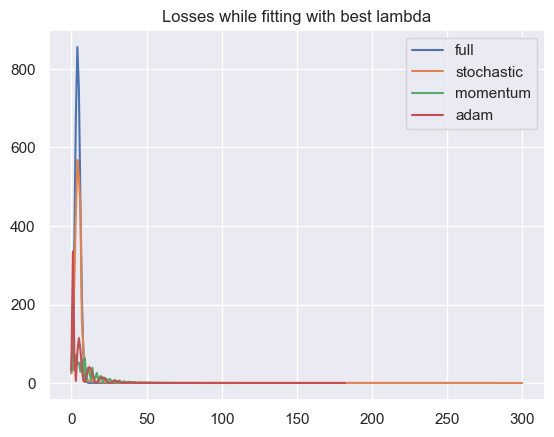

In [167]:
for res in results:
    plt.plot(res["losses_history"], label=res["method_name"])

plt.title("Losses while fitting with best lambda")
plt.legend()
plt.show()

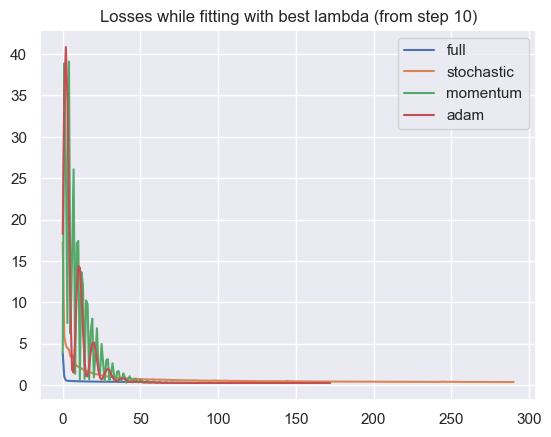

In [168]:
for res in results:
    plt.plot(res["losses_history"][10:], label=res["method_name"])

plt.title("Losses while fitting with best lambda (from step 10)")
plt.legend()
plt.show()

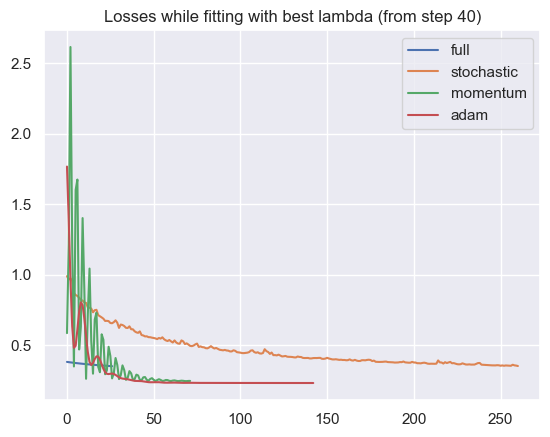

In [169]:
for res in results:
    plt.plot(res["losses_history"][40:], label=res["method_name"])

plt.title("Losses while fitting with best lambda (from step 40)")
plt.legend()
plt.show()

**Выводы:**

1. Для всех методов выиграл большой шаг - это, скорее всего особенность рельефа функции потерь в нашей задаче, в дл, к примеру, чаще используется очень низкий lr
2. У адама выиграла лямбда аж 5 - он умеет к такому приспосабливаться, не перепрыгивая через оптимум, по мере приближения к нему
3. Стохастическому не хватило шагов - стандартный batch_size = 10 неплохо приближает функцию (градиент не разнесло), но не хватает для достаточно длинных шагов
4. full сошелся быстрее всех по понятным причинам, но попал в локальным минимум
5. Видно, как блуждают adam и momentum вдали от оптимума, причем adam делает это чуть реже как раз из-за адаптации
6. Итого: самый лучший - adam с lambda = 5, самый быстросходящийся - full
7. R^2 тоже подтверждает выводы, как показатель адекватности модели - в adam и momentum мы больше задействуем данные 

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [170]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 1
    }
}

In [171]:
from time import time

In [172]:
batch_sizes = np.arange(5, 500, 10)

mean_time = []
mean_iter = []
mean_loss_val = []
mean_loss_train = []

for batch_size in tqdm(batch_sizes):
    descent_config["kwargs"]["batch_size"] = batch_size
    time_spent = []
    iterations = []
    losses_train = []
    losses_val = []
    for _ in range(10):
        descent = get_descent(descent_config)
        regression = LinearRegression(
            descent_config=descent_config,
            max_iter=500
        )

        start_time = time()
        regression.fit(x_train, y_train)
        stop_time = time()

        losses_train.append(regression.loss_history[-1])
        loss_val = regression.calc_loss(x_val, y_val)
        losses_val.append(loss_val) 
        iterations.append(len(regression.loss_history) - 1)
        time_spent.append(stop_time - start_time)
    mean_time.append(np.mean(time_spent))
    mean_iter.append(np.mean(iterations))
    mean_loss_val.append(np.mean(losses_val))
    mean_loss_train.append(np.mean(losses_train))

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [07:02<00:00,  8.44s/it]


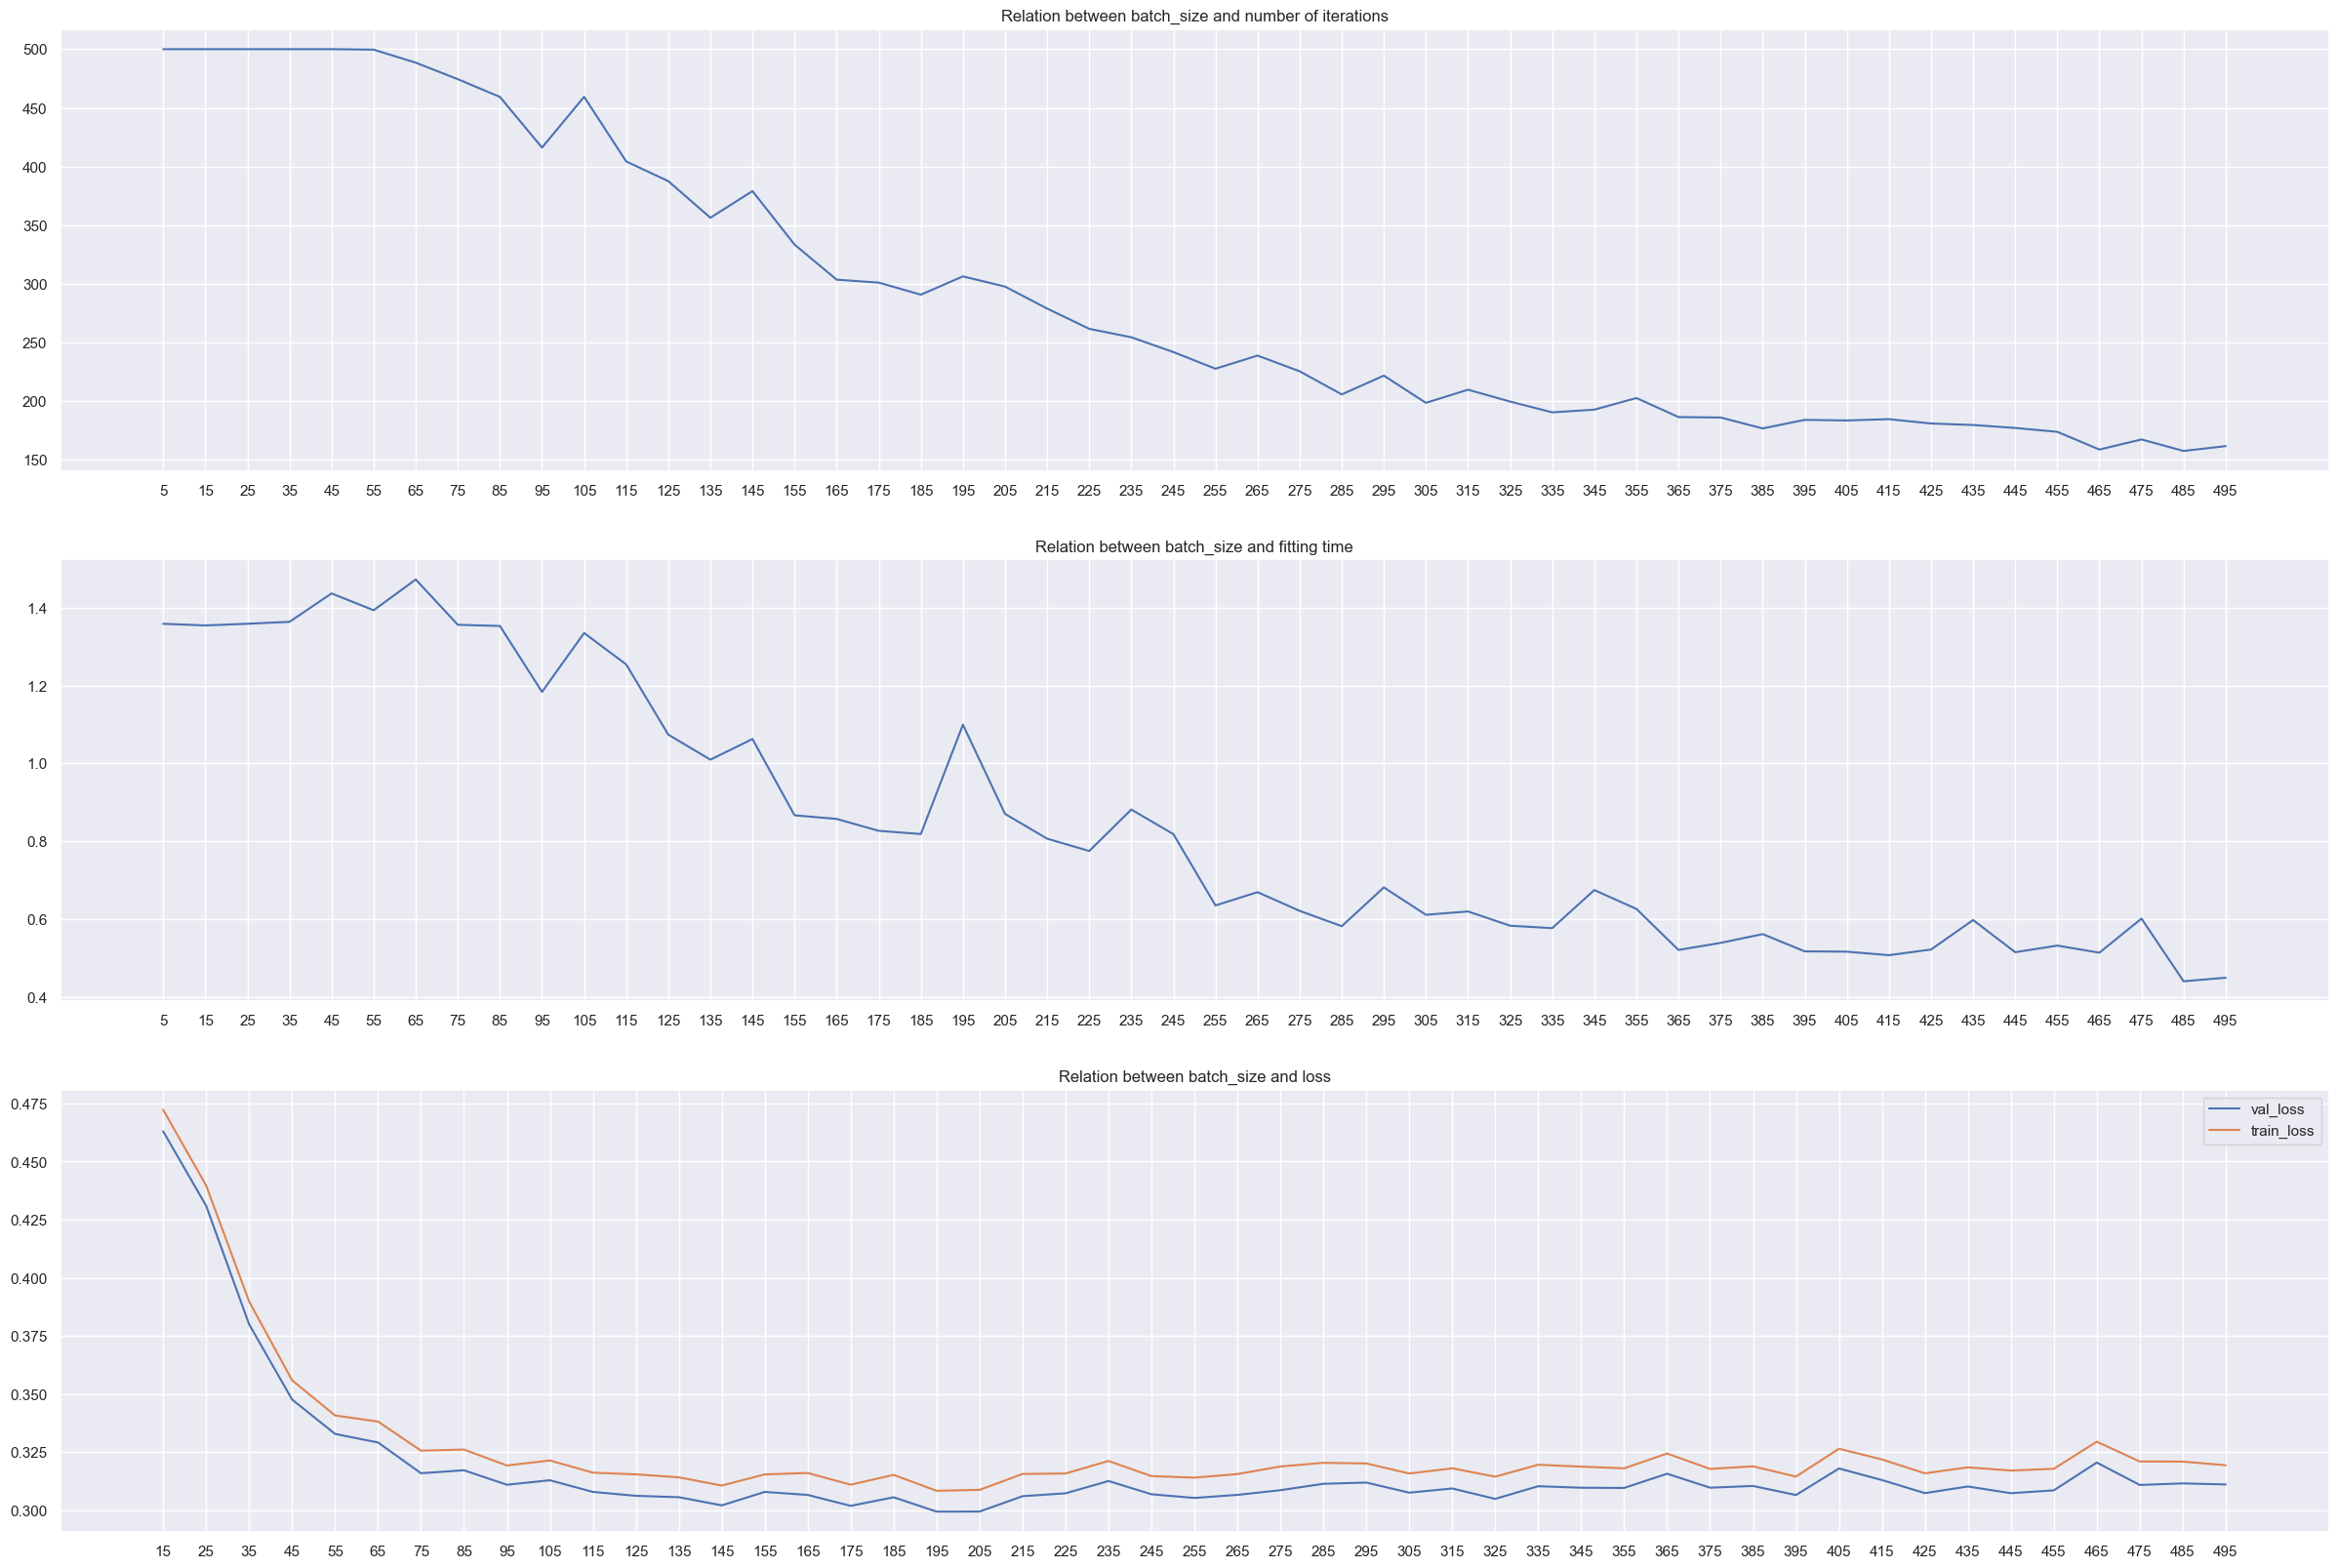

In [173]:
fig, ax = plt.subplots(3, 1, figsize=(30, 20))

ax[0].plot(mean_iter)
ax[0].set_title("Relation between batch_size and number of iterations")
ax[0].set_xticks(ticks=range(len(batch_sizes)), labels=batch_sizes)

ax[1].plot(mean_time)
ax[1].set_title("Relation between batch_size and fitting time")
ax[1].set_xticks(ticks=range(len(batch_sizes)), labels=batch_sizes)

ax[2].plot(mean_loss_val[1:], label="val_loss")
ax[2].plot(mean_loss_train[1:], label="train_loss")
ax[2].set_title("Relation between batch_size and loss")
ax[2].set_xticks(ticks=range(len(batch_sizes) - 1), labels=batch_sizes[1:])

plt.legend()
plt.show()

1. Количество итераций и время обучения довольно быстро убывает и выходит на плато в 170 итераций и меньше 0.5 секунд при размере батча около 450
2. Ошибка выходит на плато уже с размера батча 85, но при этом ошибка не уходит ниже 0.3 - скорее всего, нужен batch_size сильно больше 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: [96960318](https://contest.yandex.ru/contest/54610/run-report/96960318/)

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [174]:
from itertools import product

In [175]:
descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'name',
    'regularized': True,
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 1e-3,
        'mu': 0
    }
}

In [176]:
mus = [5, 1, 0, 1e-1, 1e-2, 1e-3, 1e-4]
params_pairs = list(product(lambdas, mus))

stats_dict_reg = create_stats_dict()

for descent_name in descent_names:
    descent_config['descent_name'] = descent_name
    for lambda_, mu in tqdm(params_pairs):
        descent_config['kwargs']['lambda_'] = lambda_
        descent_config['kwargs']['mu'] = mu
        descent = get_descent(descent_config)

        regression = LinearRegression(
            descent_config=descent_config
        )

        fit_and_update_stats(regression, x_train, y_train, x_val, y_val, stats_dict_reg, descent_name)

  0%|          | 0/49 [00:00<?, ?it/s]

100%|██████████| 49/49 [01:30<00:00,  1.84s/it]


In [177]:
results_reg = get_best_params(stats_dict_reg, params_pairs, "lambda_mu")   
results_reg_df = pd.DataFrame(results_reg)
results_reg_df[["method_name", "losses_train", "losses_val", "r_2_train", "r_2_val", "iterations", "lambda_mu"]]

,method_name,losses_train,losses_val,r_2_train,r_2_val,iterations,lambda_mu
0,full,0.383905,0.369288,0.690423,0.701086,300,"(1, 0.01)"
1,stochastic,0.357832,0.345104,0.711448,0.720661,300,"(1, 0.001)"
2,momentum,0.247841,0.240296,0.800144,0.805497,300,"(1, 0.001)"
3,adam,0.229798,0.224499,0.814694,0.818283,164,"(5, 0)"


In [178]:
results_df[["method_name", "losses_train", "losses_val", "r_2_train", "r_2_val", "iterations", "lambda"]]

,method_name,losses_train,losses_val,r_2_train,r_2_val,iterations,lambda
0,full,0.349393,0.339419,0.718254,0.725263,66,1
1,stochastic,0.350656,0.343373,0.717235,0.722062,300,1
2,momentum,0.244774,0.237513,0.802617,0.807749,111,1
3,adam,0.229916,0.224655,0.814598,0.818156,182,5


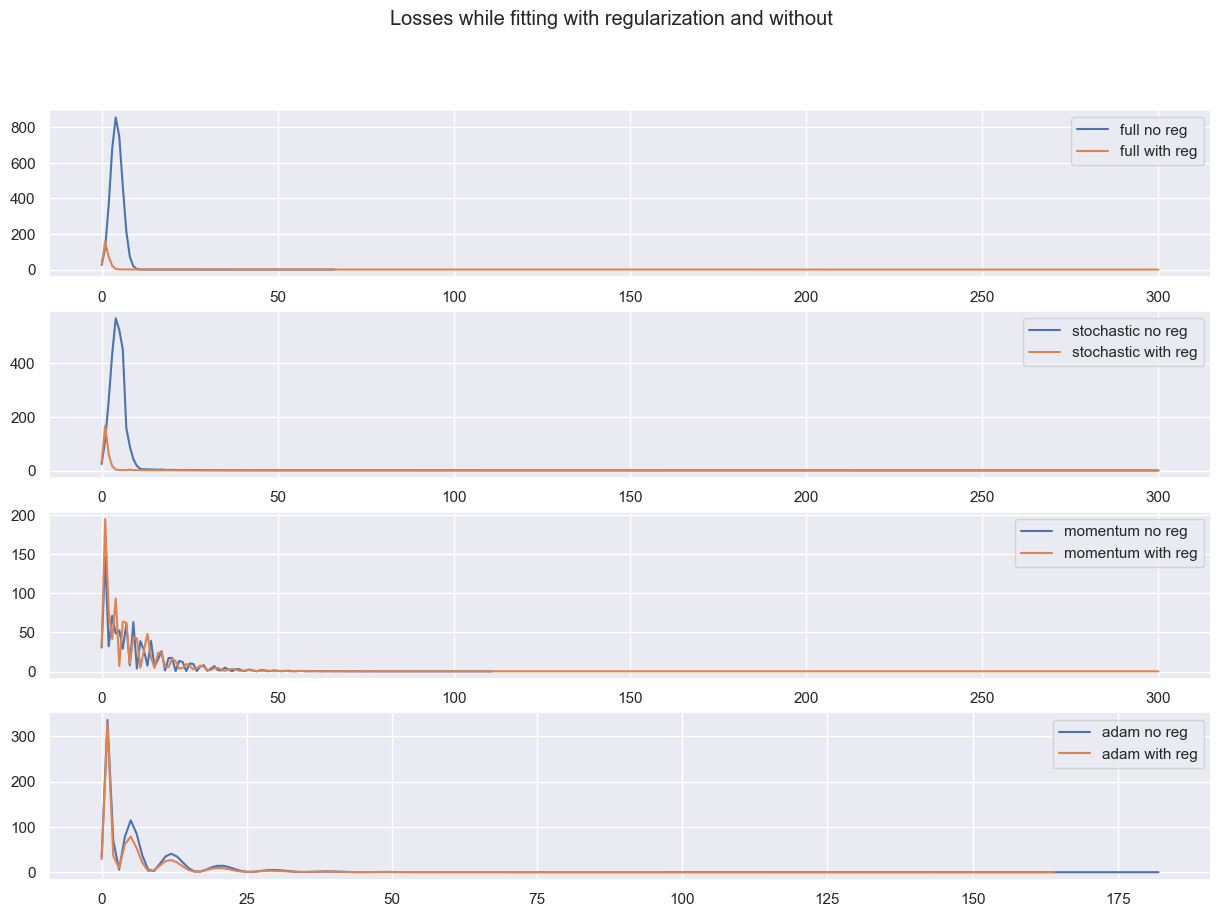

In [179]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
descent_names_numed = {"full": 0, "stochastic": 1, "momentum": 2, "adam": 3}

for res in results:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"], label=(res["method_name"] + " no reg"))

for res in results_reg:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"], label=(res["method_name"] + " with reg"))
    ax[descent_names_numed[res["method_name"]]].legend()

plt.suptitle("Losses while fitting with regularization and without")
plt.legend()
plt.show()

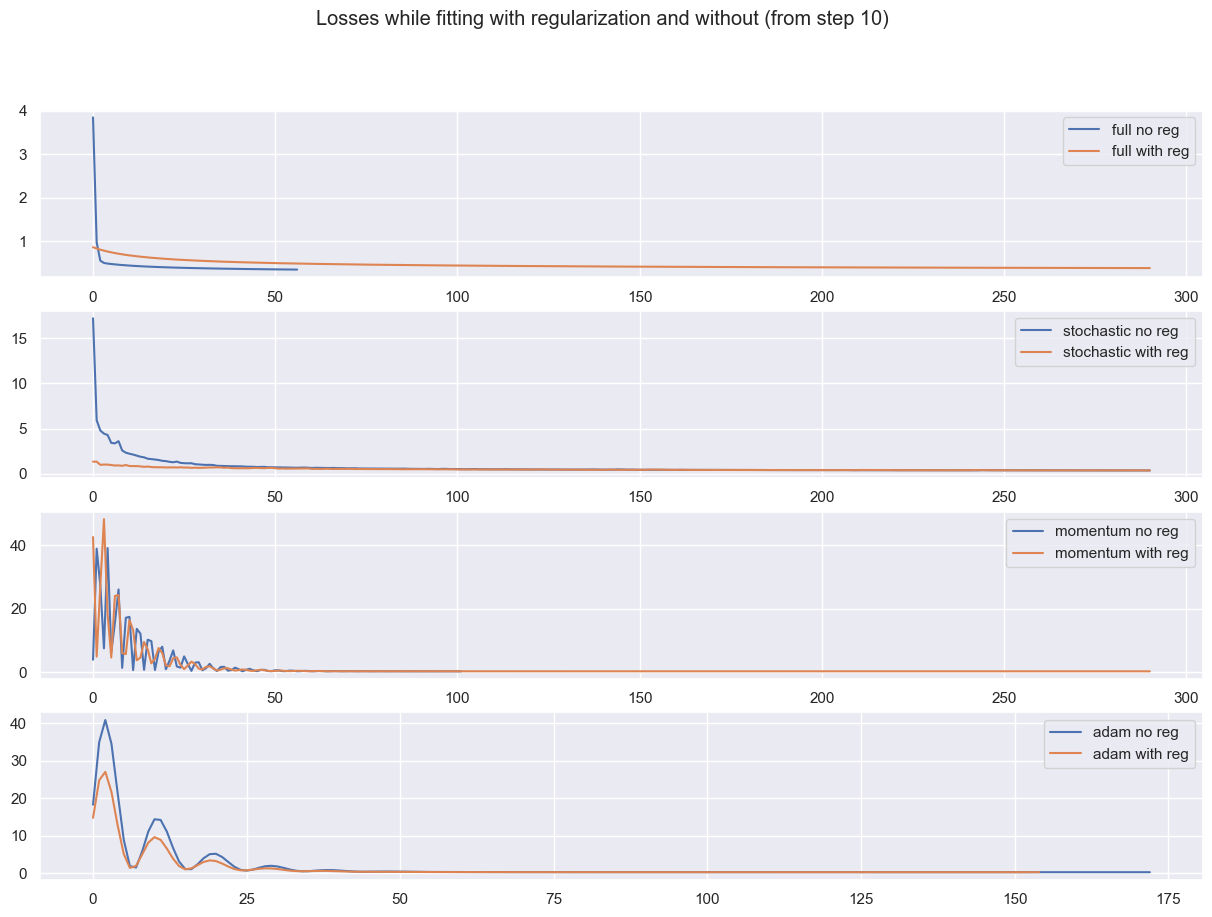

In [180]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
descent_names_numed = {"full": 0, "stochastic": 1, "momentum": 2, "adam": 3}

for res in results:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][10:], label=(res["method_name"] + " no reg"))

for res in results_reg:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][10:], label=(res["method_name"] + " with reg"))
    ax[descent_names_numed[res["method_name"]]].legend()

plt.suptitle("Losses while fitting with regularization and without (from step 10)")
plt.legend()
plt.show()

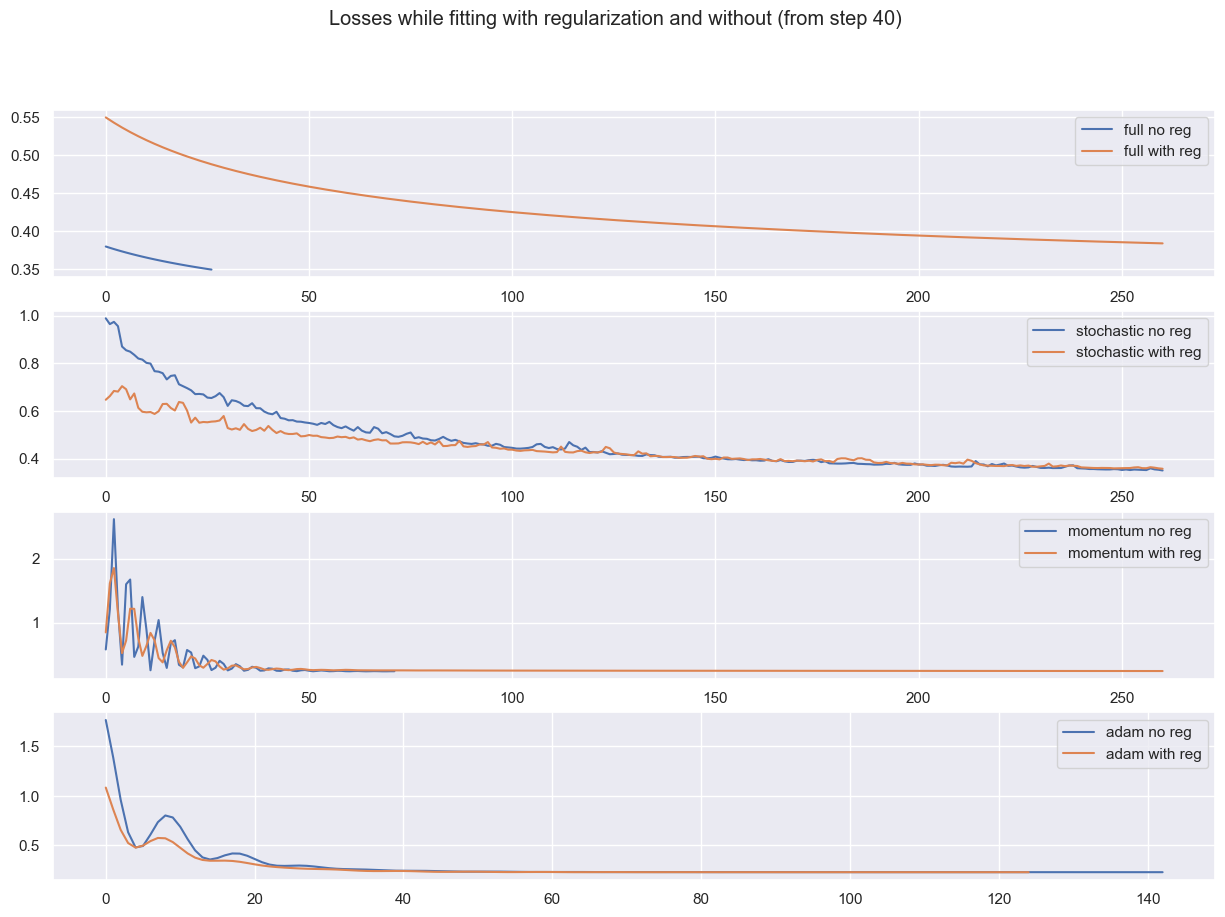

In [181]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
descent_names_numed = {"full": 0, "stochastic": 1, "momentum": 2, "adam": 3}

for res in results:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][40:], label=(res["method_name"] + " no reg"))

for res in results_reg:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][40:], label=(res["method_name"] + " with reg"))
    ax[descent_names_numed[res["method_name"]]].legend()

plt.suptitle("Losses while fitting with regularization and without (from step 40)")
plt.legend()
plt.show()

**Выводы:**

1. Cкорость сходимости улучшилась только у Адама 
2. Остальные методы так и не сошлись за 300 итераций
3. Во всех методах градиент быстрее приближался к оптимуму - проще найти нужную "ямку", но вот как было сказано в пункте 2, градиенту из-за ограничений сложно сойтись в оптимум
4. Блуждания градиента стали более гладкими

**Про качество**

1. В полном спуске - ухудшилось.
2. Адам и (на удивление) стохастический не изменилсь - адам сам по себе делает неплохую регуляризацию
3. А вот momentum стал лучше на валидации - скорее всего, было небольшое переобучение

**Итог:** в нашем случае для Адама есть смысл использовать регуляризацию для скорости

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$\frac{dL(y, a)}{da} = \frac{1}{cosh(a - y)} \cdot sinh(a - y) = tanh(a - y)$$

По правилам дифференцирования сложной функции
$$\frac{dL(y, a)}{dw} = (\frac{da}{dw})^T \cdot \frac{dL(y, a)}{da}$$

$\frac{da}{dw}$ - Якобиан 

$$\frac{da}{dw} = \frac{d(Xw)}{dw} = X$$

$$\frac{dL(y, a)}{dw} = X^Ttanh(Xw - y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [206]:
from descents import LossFunction

In [207]:

descent_names = ['full', 'stochastic', 'momentum', 'adam']

descent_config = {
    'descent_name': 'name',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 1e-3,
        'loss_function': LossFunction.LogCosh
    }
}

stats_dict_logcosh = create_stats_dict()

for descent_name in tqdm(descent_names):
    descent_config['descent_name'] = descent_name
    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        descent = get_descent(descent_config)

        regression = LinearRegression(
            descent_config=descent_config
        )

        fit_and_update_stats(regression, x_train, y_train, x_val, y_val, stats_dict_logcosh, descent_name)

        stats_dict_logcosh[descent_name]["mse_val"].append(MSE(regression.predict(x_val), y_val))
        stats_dict_logcosh[descent_name]["mse_train"].append(MSE(regression.predict(x_train), y_train))
    

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:24<00:00,  6.23s/it]


In [208]:
results_logcosh = get_best_params(stats_dict_logcosh, lambdas, "lambda")   
results_logcosh_df = pd.DataFrame(results_logcosh)
results_logcosh_df[["method_name", "mse_train", "mse_val", "losses_train", "losses_val", "r_2_train", "r_2_val", "iterations", "lambda"]]

,method_name,mse_train,mse_val,losses_train,losses_val,r_2_train,r_2_val,iterations,lambda
0,full,0.301006,0.293745,0.118535,0.115985,0.757272,0.762233,84,5
1,stochastic,0.273477,0.263441,0.109994,0.106478,0.779471,0.786762,300,5
2,momentum,0.246671,0.239107,0.097197,0.094597,0.801088,0.806459,161,5
3,adam,0.234131,0.228758,0.092886,0.090976,0.811200,0.814836,155,1


In [210]:
results_df[["method_name", "losses_train", "losses_val", "r_2_train", "r_2_val", "iterations", "lambda"]]

,method_name,losses_train,losses_val,r_2_train,r_2_val,iterations,lambda
0,full,0.349393,0.339419,0.718254,0.725263,66,1
1,stochastic,0.350656,0.343373,0.717235,0.722062,300,1
2,momentum,0.244774,0.237513,0.802617,0.807749,111,1
3,adam,0.229916,0.224655,0.814598,0.818156,182,5


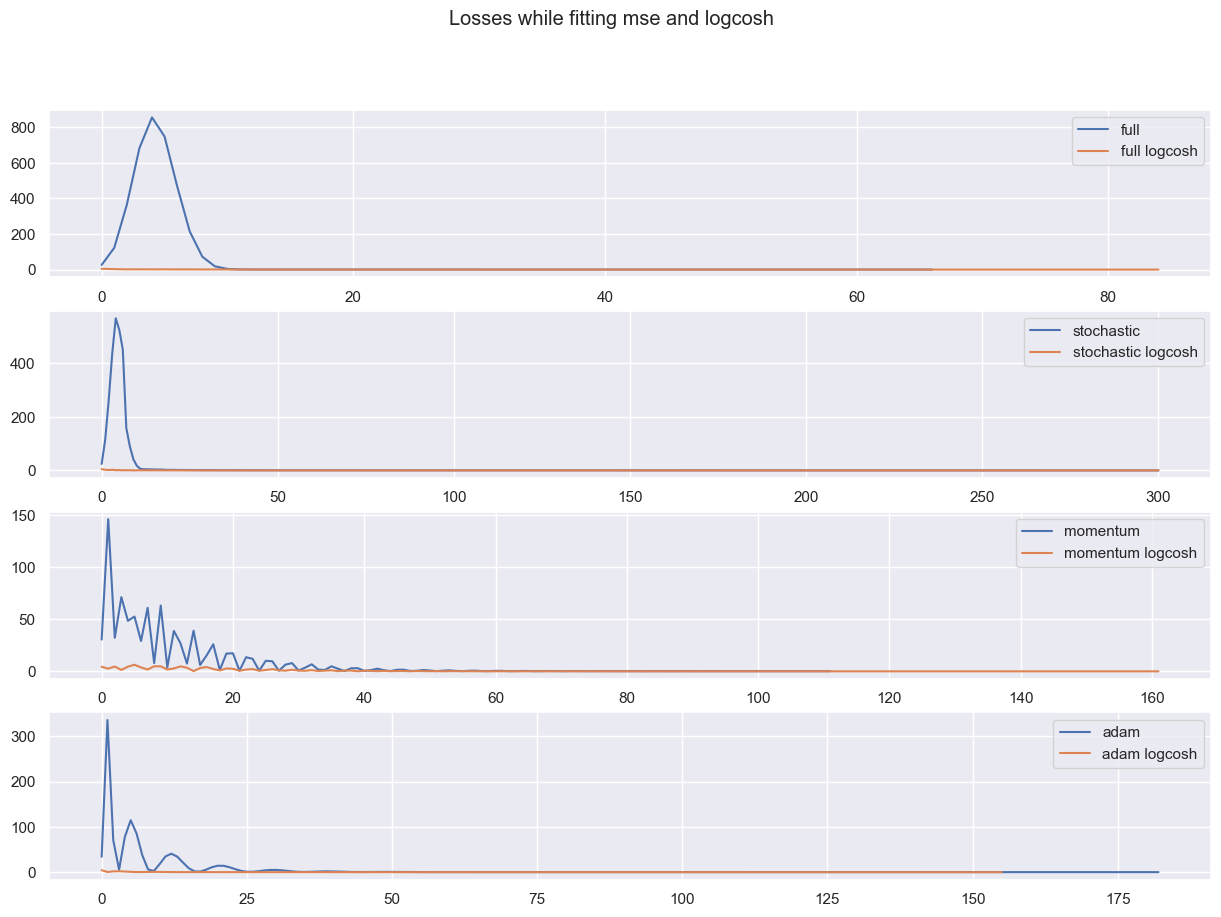

In [214]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
descent_names_numed = {"full": 0, "stochastic": 1, "momentum": 2, "adam": 3}

for res in results:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"], label=(res["method_name"]))

for res in results_logcosh:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"], label=(res["method_name"] + " logcosh"))
    ax[descent_names_numed[res["method_name"]]].legend()

plt.suptitle("Losses while fitting mse and logcosh")
plt.legend()
plt.show()

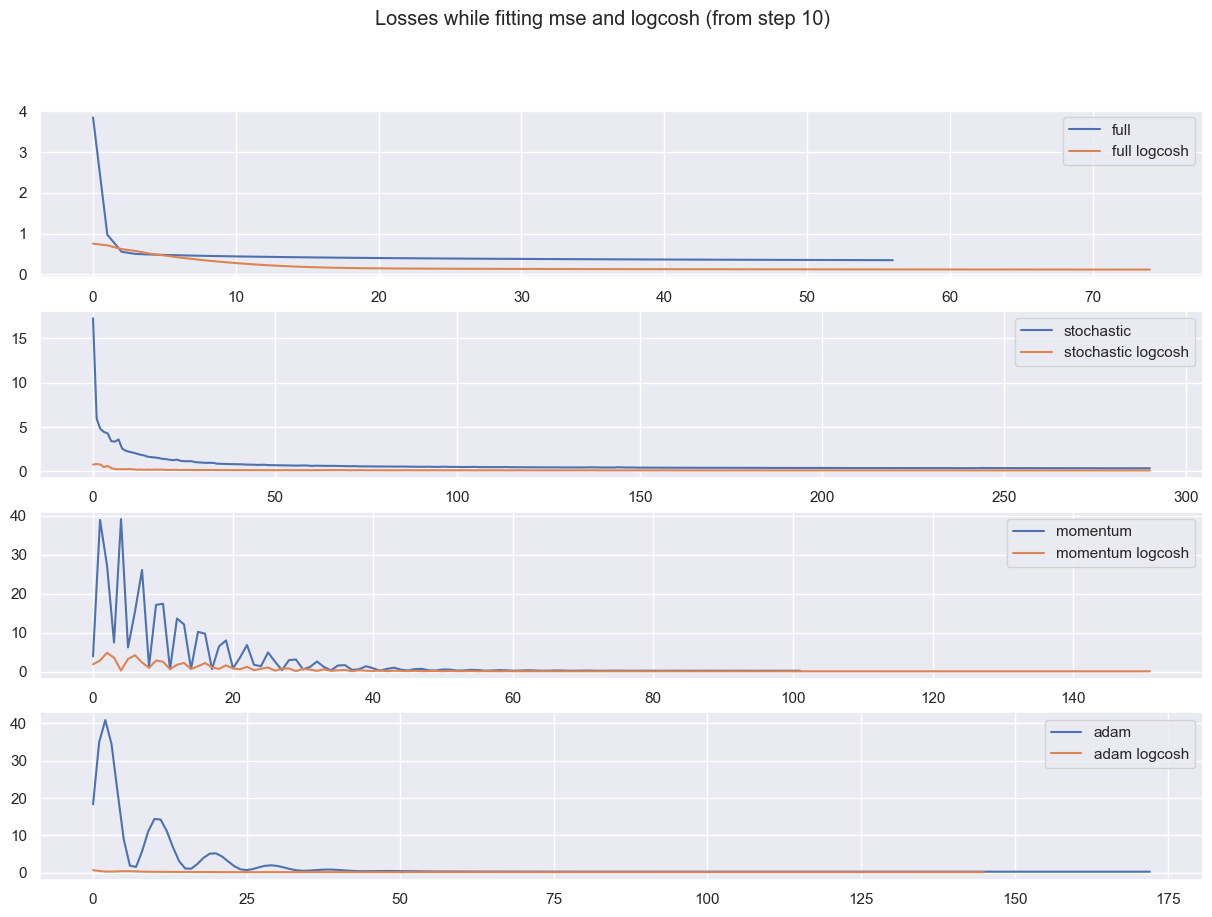

In [215]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
descent_names_numed = {"full": 0, "stochastic": 1, "momentum": 2, "adam": 3}

for res in results:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][10:], label=(res["method_name"]))

for res in results_logcosh:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][10:], label=(res["method_name"] + " logcosh"))
    ax[descent_names_numed[res["method_name"]]].legend()

plt.suptitle("Losses while fitting mse and logcosh (from step 10)")
plt.legend()
plt.show()

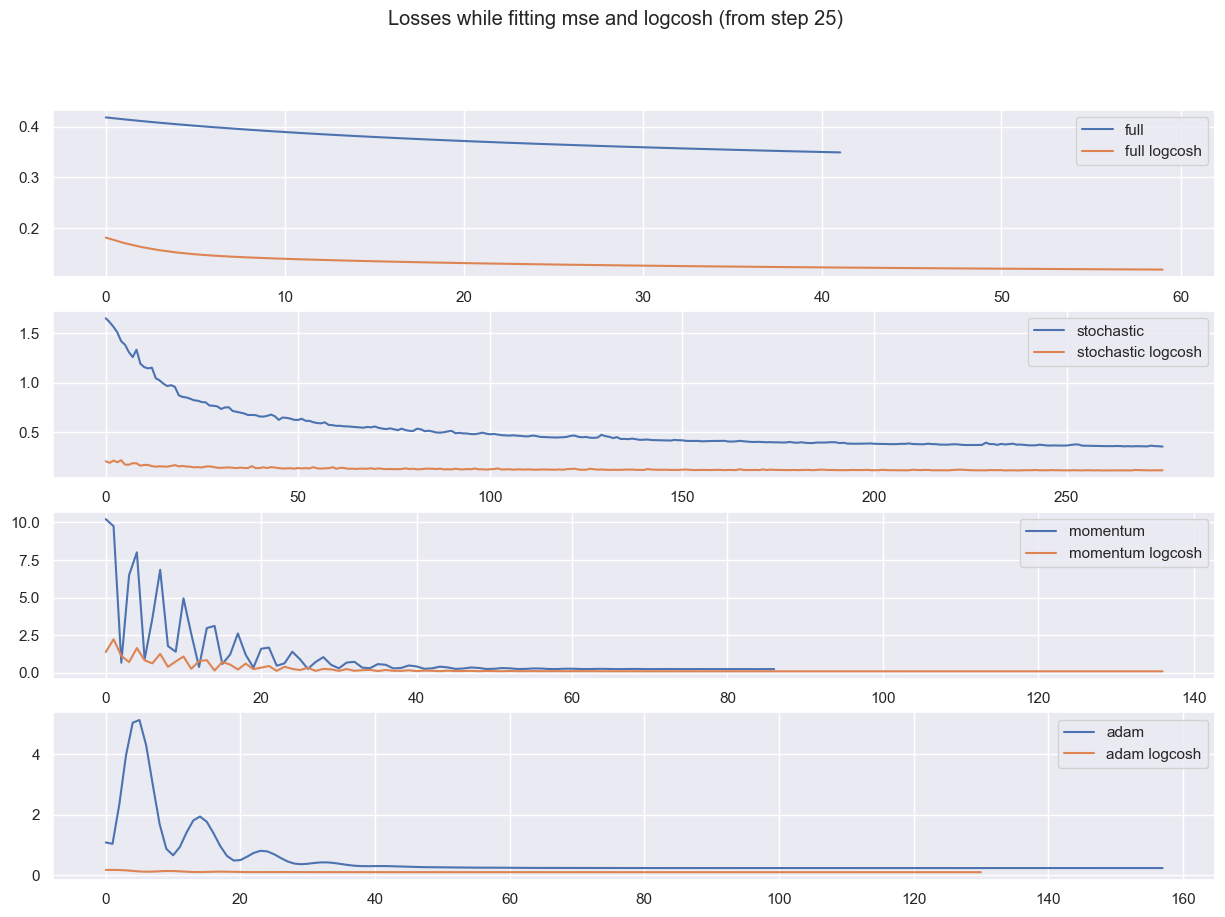

In [216]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
descent_names_numed = {"full": 0, "stochastic": 1, "momentum": 2, "adam": 3}

for res in results:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][25:], label=(res["method_name"]))

for res in results_logcosh:
    ax[descent_names_numed[res["method_name"]]].plot(res["losses_history"][25:], label=(res["method_name"] + " logcosh"))
    ax[descent_names_numed[res["method_name"]]].legend()

plt.suptitle("Losses while fitting mse and logcosh (from step 25)")
plt.legend()
plt.show()

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Моя социализация успешно прошла 5 лет назад, поэтому теперь один прекрасный человек угощает меня. Вот, например, в день решения домашки я ел очень вкусную шакшуку

![Шакшука](food_2.jpeg)

Но я тоже умею радовать этого человека едой!! Не так давно я готовил лимонный брауни по какому-то английскому рецепту, который я уже и не вспомню, но есть фото

![Лимонный брауни](food_1.jpeg)

А еще у меня есть канал с моими кулинарнымы опытами, но прикладывать я его не буду(

Но раз тут просили рецепт, то у меня есть фирменный авторский рецепт грибного крем-супа

1. Шампиньоны - 400г
2. Лук - 1шт (средняя)
3. Картофель - 1 шт (большая)
4. Сливки 20% - 200мл
5. Сливочное масло
6. Вода
7. Багет/гренки

Время: 40-80 минут, зависит от ловкости рук

**Что делать?**

1. Луковичку пополам и полукольцами

2. Шампиньоны режем как угодно не мелко и не крупно, чтобы обжарились. Но из серединки вырезаем около 10 красивых кусочков - для украшения

3. Картофелину режем небольшими кубиками, чтобы проварилась

4. Берем кастрюльку и на маленьком (или чуть выше) огне пассеруем лук (обжариваем до прозрачности или легкой золотистости). В это время можно выполнять пункт 2, если вы очень быстрые

5. После этого закидываем шампиньоны и обжариваем пару минут. Нужно смотреть по ним: чем темнее они становятся, тем более сероватым будет суп, кому как нравится. Тут же ставим чайник кипеть

6. Закидываем картошку и заливаем водой из чайника, чтобы она покрыла все и чуть еще (порядка 600-700мл хватит)

7. Варим 20 минут

8. Хорошенько блендерим до однородности. Прям хорошенько

9. Вливаем 200мл сливок и перемешиваем

10. Ставим снова на огонь и доводим до кипения

**А украшение?**

1. Топим сливочное масло на маленьком огне

2. Раскладываем наши красивые кусочки и сразу же переворачиваем в этом же порядке. Их не надо жарить, 4 секунды с каждой стороны и готово

3. Снимаем на тарелочку друг рядом с другом

4. В эту же сковороду выкладываем нарезанный кубиками багет

5. Хорошенько перемешиваем в сливочном масле, пропитанном шампиньонами, чтобы все впиталось

6. Можно чуть увеличить огонь и готовить под крышкой иногда помешивая. Готовность - по вкусу

7. Выкладываем!

![Супчик](soup.jpeg)

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [183]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [184]:
# YOUR CODE: